# Q1

In [2]:
# 구분자 : comma(“,”), 4,572 Rows, 5 Columns, UTF-8 인코딩(DataSet_01.csv 이용)

# 글로벌 전자제품 제조회사에서 효과적인 마케팅 방법을 찾기
# 위해서 채널별 마케팅 예산과 매출금액과의 관계를 분석하고자
# 한다.
# 컬 럼 / 정 의  /   Type
# TV   /     TV 마케팅 예산 (억원)  /   Double
# Radio / 라디오 마케팅 예산 (억원)  /   Double
# Social_Media / 소셜미디어 마케팅 예산 (억원)  / Double
# Influencer / 인플루언서 마케팅 (인플루언서의 영향력 크기에 따라 Mega / Macro / Micro / Nano) / String
# SALES / 매출액 / Double

In [7]:
import pandas as pd
import numpy as np
data = pd.read_csv('e:/Git_private_dodo_Riley/laptop_desktop/Code_SJH/proDS_특강/data/Dataset_01.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social_Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


## Q1-1

In [6]:
# 1. 데이터 세트 내에 총 결측값의 개수는 몇 개인가? (답안 예시) 23

In [10]:
data.isnull().sum().sum()

26

In [17]:
# 결측값이 하나라도 있는 행은 몇개인가?
len(data)-len(data.dropna(how='any'))
data.isna().any(axis=1).sum()

26

## Q1-2

In [5]:
# 2. TV, Radio, Social Media 등 세 가지 다른 마케팅 채널의 예산과 매출액과의 상관분석을
# 통하여 각 채널이 매출에 어느 정도 연관이 있는지 알아보고자 한다. 
# - 매출액과 가장 강한 상관관계를 가지고 있는 채널의 상관계수를 소수점 5번째
# 자리에서 반올림하여 소수점 넷째 자리까지 기술하시오. (답안 예시) 0.1234

In [18]:
q2 = data.drop('Influencer', axis=1)
q2.corr()

,TV,Radio,Social_Media,Sales
TV,1.000000,0.869460,0.528168,0.999497
Radio,0.869460,1.000000,0.607452,0.869105
Social_Media,0.528168,0.607452,1.000000,0.528906
Sales,0.999497,0.869105,0.528906,1.000000


## Q1-3

In [ ]:
# 3. 매출액을 종속변수, TV, Radio, Social Media의 예산을 독립변수로 하여 회귀분석을
# 수행하였을 때, 세 개의 독립변수의 회귀계수를 큰 것에서부터 작은 것 순으로
# 기술하시오. 
# - 분석 시 결측치가 포함된 행은 제거한 후 진행하며, 회귀계수는 소수점 넷째 자리
# 이하는 버리고 소수점 셋째 자리까지 기술하시오. (답안 예시) 0.123

In [20]:
from sklearn.linear_model import LinearRegression
q3 = data.dropna()
lr = LinearRegression()
lr.fit(q3[['TV','Radio','Social_Media']], q3['Sales'])
lr.coef_

array([ 3.56256963, -0.00397039,  0.00496402])

# Q2

In [25]:
# # 문제 02 유형(DataSet_02.csv 이용)
# 구분자 : comma(“,”), 200 Rows, 6 Columns, UTF-8 인코딩

# 환자의 상태와 그에 따라 처방된 약에 대한 정보를 분석하고자한다
# 
# 컬 럼 / 정 의  / Type
# Age  / 연령 / Integer
# Sex / 성별 / String
# BP / 혈압 레벨 / String
# Cholesterol / 콜레스테롤 레벨 /  String
# Na_to_k / 혈액 내 칼륨에 대비한 나트륨 비율 / Double
# Drug / Drug Type / String

In [53]:
import pandas as pd
import numpy as np
data = pd.read_csv('e:/Git_private_dodo_Riley/laptop_desktop/Code_SJH/proDS_특강/data/Dataset_02.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## Q2-1

In [28]:
# 1.해당 데이터에 대한 EDA를 수행하고, 여성으로 혈압이 High, Cholesterol이 Normal인
# 환자의 전체에 대비한 비율이 얼마인지 소수점 네 번째 자리에서 반올림하여 소수점 셋째
# 자리까지 기술하시오. (답안 예시) 0.123
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [40]:
data.Cholesterol.unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [43]:
a1 = len(data[(data['Sex']=='F')&(data['Cholesterol']=='NORMAL')&(data['BP']=='HIGH')])
a2 = len(data)
round(a1/a2,4)

0.105

## Q2-2

In [ ]:
# 2. Age, Sex, BP, Cholesterol 및 Na_to_k 값이 Drug 타입에 영향을 미치는지 확인하기
# 위하여 아래와 같이 데이터를 변환하고 분석을 수행하시오. 
# - Age_gr 컬럼을 만들고, Age가 20 미만은 ‘10’, 20부터 30 미만은 ‘20’, 30부터 40 미만은
# ‘30’, 40부터 50 미만은 ‘40’, 50부터 60 미만은 ‘50’, 60이상은 ‘60’으로 변환하시오. 
# - Na_K_gr 컬럼을 만들고 Na_to_k 값이 10이하는 ‘Lv1’, 20이하는 ‘Lv2’, 30이하는 ‘Lv3’, 30 
# 초과는 ‘Lv4’로 변환하시오.
# - Sex, BP, Cholesterol, Age_gr, Na_K_gr이 Drug 변수와 영향이 있는지 독립성 검정을
# 수행하시오.
# - 검정 수행 결과, Drug 타입과 연관성이 있는 변수는 몇 개인가? 연관성이 있는 변수
# 가운데 가장 큰 p-value를 찾아 소수점 여섯 번째 자리 이하는 버리고 소수점 다섯
# 번째 자리까지 기술하시오.
# (답안 예시) 3, 1.23456

In [49]:
q2 = data.copy()
q2['Age_gr']=np.where(q2.Age < 20, 10, 
                np.where(q2.Age < 30, 20,
                   np.where(q2.Age < 40, 30,
                      np.where(q2.Age < 50, 40, 
                         np.where(q2.Age < 60, 50, 60)))))

q2['Na_K_gr']=np.where(q2.Na_to_K <= 10, 'Lv1',
                 np.where(q2.Na_to_K <= 20, 'Lv2',
                    np.where(q2.Na_to_K <= 30, 'Lv3', 'Lv4')))  

# 독립성 검정 > 카이제곱 검정 > 교차표 필요
from scipy.stats import chi2_contingency
var_list=['Sex', 'BP', 'Cholesterol', 'Age_gr', 'Na_K_gr']
result = []
for i in var_list:
    temp = pd.crosstab(index=data[i], columns=data['Drug'])
    out = chi2_contingency(temp)
    chi2, pvalue = out[0], out[1]
    result.append([i,chi2,pvalue])
    
result

[['Sex', 2.119248418109203, 0.7138369773987128],
 ['BP', 143.2328718496999, 5.0417334144665895e-27],
 ['Cholesterol', 19.609657681313475, 0.0005962588389856497],
 ['Age_gr', 46.440652324723914, 0.0007010113024729462],
 ['Na_K_gr', 93.31006327437028, 1.1254641594413981e-14]]

## Q2-3

In [51]:
# 3.Sex, BP, Cholesterol 등 세 개의 변수를 다음과 같이 변환하고 의사결정나무를 이용한
# 분석을 수행하시오.
# - Sex는 M을 0, F를 1로 변환하여 Sex_cd 변수 생성
# - BP는 LOW는 0, NORMAL은 1 그리고 HIGH는 2로 변환하여 BP_cd 변수 생성
# - Cholesterol은 NORMAL은 0, HIGH는 1로 변환하여 Ch_cd 생성
# - Age, Na_to_k, Sex_cd, BP_cd, Ch_cd를 Feature로, Drug을 Label로 하여 의사결정나무를
# 수행하고 Root Node의 split feature와 split value를 기술하시오. 
# 이 때 split value는 소수점 셋째 자리까지 반올림하여 기술하시오. (답안 예시) Age, 
# 12.345

[Text(223.20000000000002, 195.696, 'X[1] <= 14.8285\ngini = 0.69405\nsamples = 200\nvalue = [91, 23, 16, 16, 54]'),
 Text(186.0, 152.208, 'X[3] <= 1.5\ngini = 0.66695\nsamples = 109\nvalue = [0, 23, 16, 16, 54]'),
 Text(111.60000000000001, 108.72, 'X[3] <= 0.5\ngini = 0.35265\nsamples = 70\nvalue = [0, 0, 0, 16, 54]'),
 Text(74.4, 65.232, 'X[4] <= 0.5\ngini = 0.49827\nsamples = 34\nvalue = [0, 0, 0, 16, 18]'),
 Text(37.2, 21.744, 'gini = 0.0\nsamples = 18\nvalue = [0, 0, 0, 0, 18]'),
 Text(111.60000000000001, 21.744, 'gini = 0.0\nsamples = 16\nvalue = [0, 0, 0, 16, 0]'),
 Text(148.8, 65.232, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 0, 0, 36]'),
 Text(260.40000000000003, 108.72, 'X[0] <= 50.5\ngini = 0.48389\nsamples = 39\nvalue = [0, 23, 16, 0, 0]'),
 Text(223.20000000000002, 65.232, 'gini = 0.0\nsamples = 23\nvalue = [0, 23, 0, 0, 0]'),
 Text(297.6, 65.232, 'gini = 0.0\nsamples = 16\nvalue = [0, 0, 16, 0, 0]'),
 Text(260.40000000000003, 152.208, 'gini = 0.0\nsamples = 91\nvalue = [91

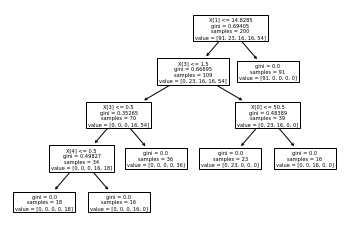

In [63]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

q3 = data.copy()
q3['Sex_cd']=np.where(q3.Sex=='M',0,1)
q3['BP_cd']=np.where(q3.BP=='LOW',0,
                    np.where(q3.BP=='NORMAL',1,2))
q3['Ch_cd']=np.where(q3.Cholesterol=='NORMAL',0,1)

X = q3[['Age', 'Na_to_K', 'Sex_cd', 'BP_cd', 'Ch_cd']]
y = q3.Drug

model = DecisionTreeClassifier()
dt = model.fit(X,y)
plot_tree(dt,precision=5)